11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 8s 25ms/step - loss: 0.2786 - val_loss: 0.1929
Epoch 2/5
235/235 [==============================] - 6s 27ms/step - loss: 0.1725 - val_loss: 0.1540
Epoch 3/5
235/235 [==============================] - 6s 27ms/step - loss: 0.1444 - val_loss: 0.1335
Epoch 4/5
235/235 [==============================] - 5s 22ms/step - loss: 0.1284 - val_loss: 0.1212
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


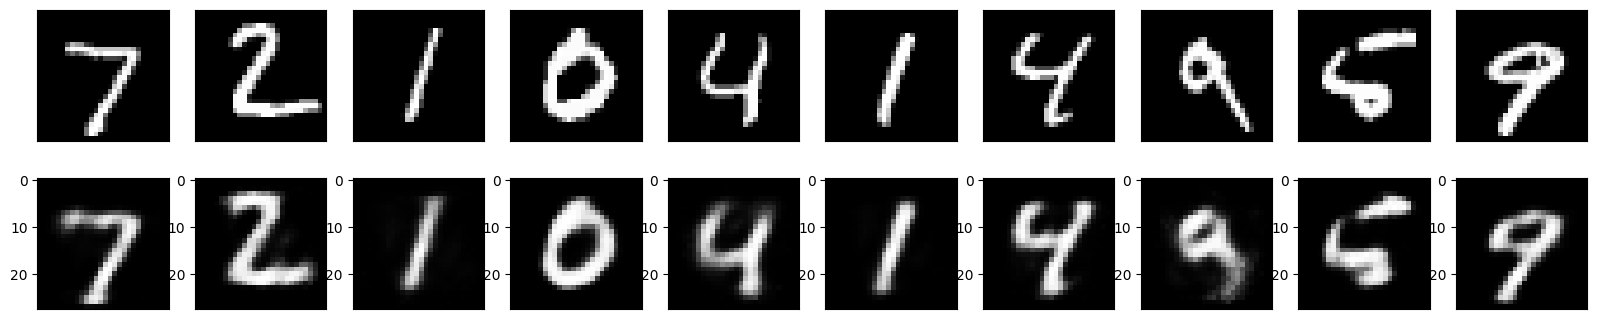

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Model Creation

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Data Preparation

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Model Fitting

autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Reconstruction and Visualization

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)

plt.show()
